# Linear Regression

Creating a relationship between a dependent variable and independent variable(s), assessing the strength of that relationship.

Correlation reveals direction of the relationship, regression the strength of the relationship.

In [34]:
#How do carats influence price? Dependent variable is price, independent variable is carats.

## $ Y_i = \beta_0 + \beta_1 X_i + \epsilon_i $

Error term is deviation from the estimated true regression.

#### For continuous data "As x increased by 1 unit, Y increases by B"

#### For binary data "If X happens, Y increases by b"

In [35]:
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
import numpy as np

In [36]:
df = pd.read_csv('diamond.csv')

In [37]:
df.head()

,Unnamed: 0,carat,colour,clarity,certification,price
0,1,0.30,D,VS2,GIA,1302
1,2,0.30,E,VS1,GIA,1510
2,3,0.30,G,VVS1,GIA,1510
3,4,0.30,G,VS1,GIA,1260
4,5,0.31,D,VS1,GIA,1641


In [38]:
x = df.carat #independent variable

y = df.price #dependent variable

print(x, y_hat)

0      0.30
1      0.30
2      0.30
3      0.30
4      0.31
       ... 
303    1.01
304    1.02
305    1.06
306    1.02
307    1.09
Name: carat, Length: 308, dtype: float64 0       1302
1       1510
2       1510
3       1260
4       1641
       ...  
303     8175
304    10796
305     9890
306     8959
307     9107
Name: price, Length: 308, dtype: int64


In [39]:
x = sm.tools.tools.add_constant(x) #don't create a new variable named constant, but add to existing x variable
x.head()

,const,carat
0,1.0,0.30
1,1.0,0.30
2,1.0,0.30
3,1.0,0.30
4,1.0,0.31


## Regression model

In [40]:
model_1 = sm.OLS(endog = y, exog = x).fit() 

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     2541.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):          3.04e-150
Time:                        20:45:22   Log-Likelihood:                -2597.9
No. Observations:                 308   AIC:                             5200.
Df Residuals:                     306   BIC:                             5207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2298.3576    158.531    -14.498      0.000   -2610.306   -1986.410
carat        1.16e+04    230.111     50.406      0.000    1.11e+04    1.21e+04
==============================================================================
Omnibus:                      170.301   Durbin-Watson:                   1.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1324.411
Skew:                           2.168   Prob(JB):                    2.56e-288
Kurtosis:                      12.187   Cond. No.                         5.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
df.head()

,Unnamed: 0,carat,colour,clarity,certification,price
0,1,0.30,D,VS2,GIA,1302
1,2,0.30,E,VS1,GIA,1510
2,3,0.30,G,VVS1,GIA,1510
3,4,0.30,G,VS1,GIA,1260
4,5,0.31,D,VS1,GIA,1641


Text(0, 0.5, 'Price')

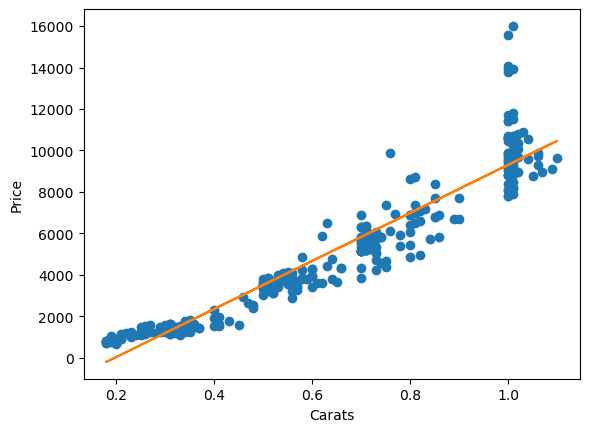

In [54]:
#plotting 

x = df.carat
plt.plot(x, y, 'o')

b, a = np.polyfit(x, y, 1)
plt.plot(x, b * x + a)
plt.xlabel("Carats")
plt.ylabel("Price")

# Dummy Variable Trap



e.g.

Observation, Coca-Cola, Pepsi
a, 1, 0
b, 0, 1
c, 0, 1 

etc.

There is multicolinearity, a perfect negative correlation between the two variables =

The solution is to remove the dummy variable.

The removed dummy variable becomes a part of the intercept.

Would only ever need to remove one dummy variable e.g.

Observation, Coca-Cola, Pepsi, White Label
a, 1, 0, 0
b, 0, 1, 0
c, 0, 0, 1

If Coca-Cola and Pepsi are kept, when both are 0 we know white label is 1

# Linear regression with dummy variable

In [55]:
df.carat.describe()

count    308.000000
mean       0.630909
std        0.277183
min        0.180000
25%        0.350000
50%        0.620000
75%        0.850000
max        1.100000
Name: carat, dtype: float64

In [56]:
#create binary variable

df["carat_binary"] = np.where(df.carat > 0.6, 1, 0)
df.head()

,Unnamed: 0,carat,colour,clarity,certification,price,carat_binary
0,1,0.30,D,VS2,GIA,1302,0
1,2,0.30,E,VS1,GIA,1510,0
2,3,0.30,G,VVS1,GIA,1510,0
3,4,0.30,G,VS1,GIA,1260,0
4,5,0.31,D,VS1,GIA,1641,0


In [58]:
#create a linear regression with the binary variable and plot

In [60]:
x = df.carat_binary
y = df.price

In [62]:
x = sm.tools.tools.add_constant(x)

In [63]:
model_2 = sm.OLS(endog = y, exog = x).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     591.5
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           1.79e-73
Time:                        21:02:07   Log-Likelihood:                -2775.6
No. Observations:                 308   AIC:                             5555.
Df Residuals:                     306   BIC:                             5563.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2225.2303    161.442     13.783      0.000    1907.553    2542.908
carat_binary  5516.8595    226.846     24.320      0.000    5070.485    5963.234
==============================================================================
Omnibus:                       33.053   Durbin-Watson:                   0.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.667
Skew:                           0.698   Prob(JB):                     2.70e-11
Kurtosis:                       4.358   Cond. No.                         2.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Lower R-squared as only two data, 0 and 1 as opposed to continuous variable.

"If the carat is greater than 0.6, then carat binary is 1 and price increases by more than 5,516.86 sterling. If the carat is less than 0.6 then the carat binary is 0 and the predicted price si 2,225.23 sterling.

Text(0, 0.5, 'Price')

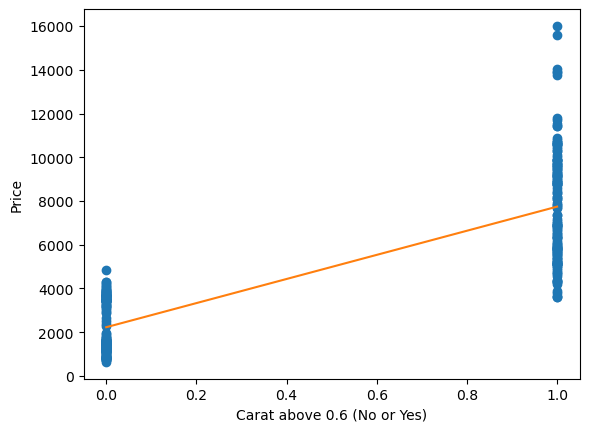

In [65]:
x = df.carat_binary

plt.plot(x, y, 'o')

b, a = np.polyfit(x, y, 1)
plt.plot(x, b * x + a)
plt.xlabel("Carat above 0.6 (No or Yes)")
plt.ylabel("Price")